# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load DS FBM cpdb celltypes

In [3]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/downs_bm/data/downs_raw_dr_20200714.h5ad')

In [4]:
adata.shape

(8622, 33694)

# Annotate with broad categories

In [5]:
annot = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/downs_broad_annots_20200728.csv")

In [6]:
refined_annot = annot["cell.labels"].tolist()
refined_annot

['CAR',
 'CD14 monocyte',
 'CD56 bright NK',
 'CD8 T cell',
 'chondrocyte ',
 'CMP',
 'DC1',
 'DC2',
 'DC3',
 'early B cell',
 'early erythroid',
 'early MK',
 'endothelium',
 'eo/baso/mast precursor',
 'eosinophil',
 'HSC',
 'ILC precursor',
 'late erythroid',
 'macrophage',
 'mast cell',
 'mature B cell',
 'mature NK',
 'MEMP',
 'mid erythroid',
 'MK',
 'promonocyte',
 'MSC',
 'myelocyte',
 'promyelocyte',
 'neutrophil',
 'promyelocyte',
 'osteoblast',
 'osteoclast',
 'pDC',
 'pre B cell',
 'promonocyte',
 'pre pDC',
 'MOP',
 'transitional NK cell',
 'Treg ']

In [7]:
broad_annot = annot["broad_fig5C_cell.labels"].tolist()
broad_annot

['stroma',
 'monocyte',
 'NK',
 'T cell',
 'stroma',
 'myeloid progenitor',
 'myeloid DC',
 'myeloid DC',
 'myeloid DC',
 'B_lineage',
 'erythroid',
 'MK',
 'stroma',
 'myeloid progenitor',
 'eosinophil',
 'HSC',
 'NK',
 'erythroid',
 'stroma',
 'mast cell',
 'B_lineage',
 'NK',
 'MEMP',
 'erythroid',
 'MK',
 'monocyte',
 'stroma',
 'neutrophil',
 'neutrophil',
 'neutrophil',
 'neutrophil',
 'stroma',
 'stroma',
 'pDC',
 'B_lineage',
 'monocyte',
 'pDC',
 'monocyte',
 'NK',
 'T cell']

In [8]:
adata.obs["broad_fig5C_cell.labels"] = adata.obs["cell.labels"].replace(refined_annot, broad_annot)

In [9]:
adata.obs["broad_fig5C_cell.labels"] = adata.obs["broad_fig5C_cell.labels"].astype('category')
adata.obs["broad_fig5C_cell.labels"].cat.categories

Index(['B_lineage', 'HSC', 'MEMP', 'MK', 'NK', 'T cell', 'eosinophil',
       'erythroid', 'mast cell ', 'monocyte', 'myeloid DC',
       'myeloid progenitor', 'neutrophil', 'pDC', 'stroma'],
      dtype='object')

In [10]:
adata.obs["broad_fig5C_cell.labels"].cat.categories[2]

'MEMP'

# Pre-process the data

In [11]:
# normalise count data 
sc.pp.normalize_total(adata)

In [12]:
# log the count data 
sc.pp.log1p(adata)

In [13]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [14]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

# Run dotplots

In [15]:
adata.obs["broad_fig5C_cell.labels"] = adata.obs["broad_fig5C_cell.labels"].astype("category")
adata.obs["broad_fig5C_cell.labels"] = adata.obs["broad_fig5C_cell.labels"].cat.reorder_categories(['HSC', 'MK', 
                'B_lineage', 'pDC',  'myeloid DC', 'eosinophil', 'mast cell ', 'myeloid progenitor', 'neutrophil', 
                'monocyte', 'NK', 'T cell', 'stroma', 'erythroid', 'MEMP'])

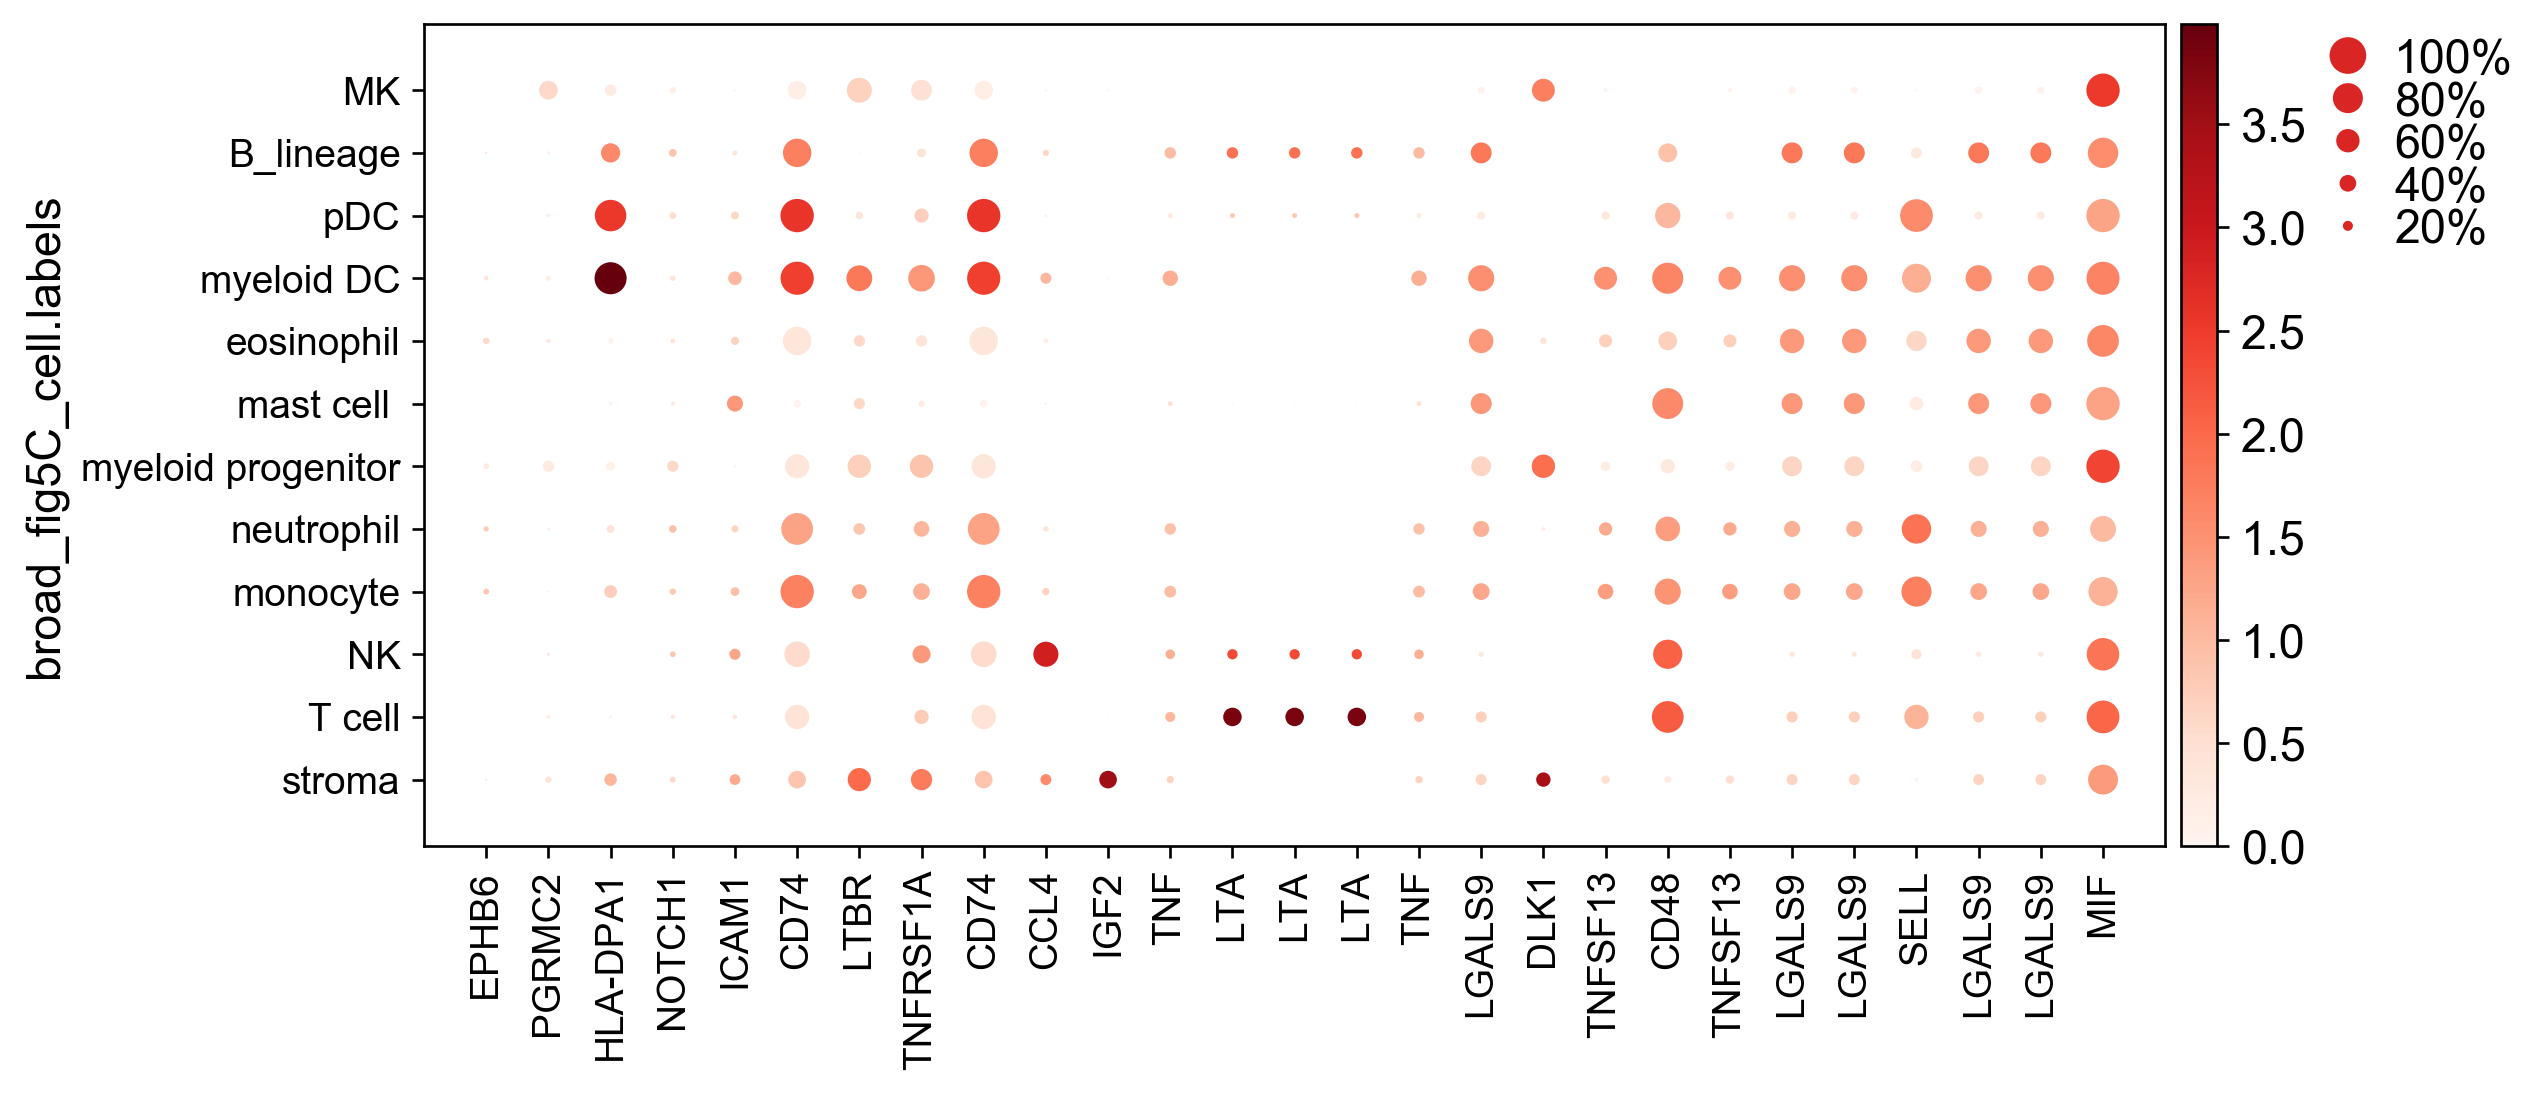

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[9.45, 0, 0.2, 0.5, 0.25])

In [16]:
genes = ['EPHB6',
'PGRMC2',
'HLA-DPA1',
'NOTCH1',
'ICAM1',
'CD74',
'LTBR',
'TNFRSF1A',
'CD74',
'CCL4',
'IGF2',
'TNF',
'LTA',
'LTA',
'LTA',
'TNF',
'LGALS9',
'DLK1',
'TNFSF13',
'CD48',
'TNFSF13',
'LGALS9',
'LGALS9',
'SELL',
'LGALS9',
'LGALS9',
'MIF']

sc.settings.set_figure_params(dpi=120, dpi_save=1000)

subset = adata[adata.obs["broad_fig5C_cell.labels"].isin(['MK', 
                'B_lineage', 'pDC',  'myeloid DC', 'eosinophil', 'mast cell ', 'myeloid progenitor', 'neutrophil', 
                'monocyte', 'NK', 'T cell', 'stroma'])].copy()

sc.pl.dotplot(subset, var_names=genes, groupby="broad_fig5C_cell.labels", use_raw=False, 
              save="figs5g_ds_cpdb_dotplot_stroma_20200728.pdf")

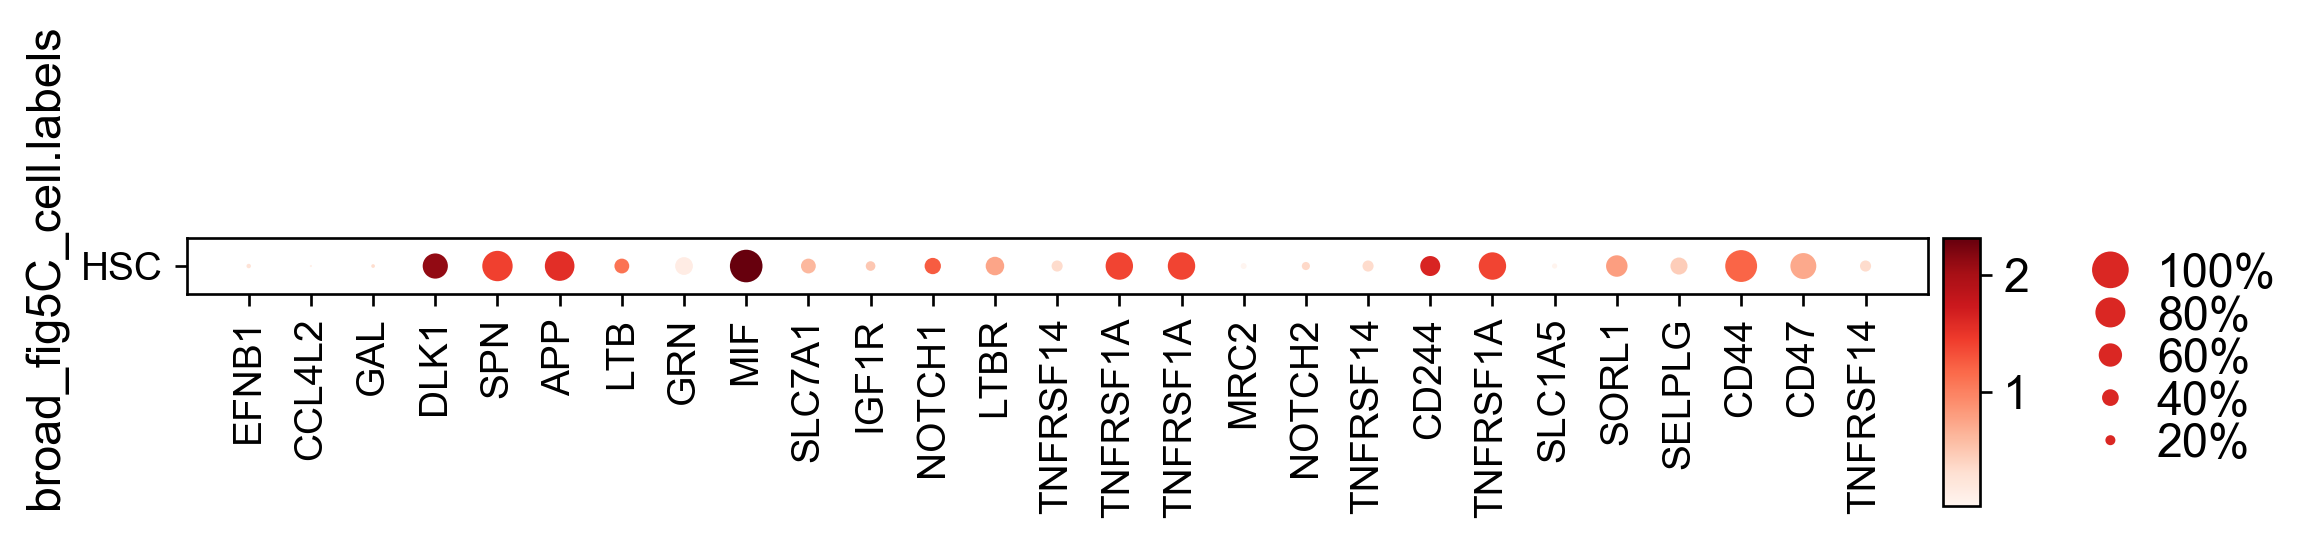

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[9.45, 0, 0.2, 0.5, 0.25])

In [17]:
genes = ['EFNB1',
'CCL4L2',
'GAL',
'DLK1',
'SPN',
'APP',
'LTB',
'GRN',
'MIF',
'SLC7A1',
'IGF1R',
'NOTCH1',
'LTBR',
'TNFRSF14',
'TNFRSF1A',
'TNFRSF1A',
'MRC2',
'NOTCH2',
'TNFRSF14',
'CD244',
'TNFRSF1A',
'SLC1A5',
'SORL1',
'SELPLG',
'CD44',
'CD47',
'TNFRSF14']

sc.settings.set_figure_params(dpi=120, dpi_save=1000)

subset = adata[adata.obs["broad_fig5C_cell.labels"].isin(["HSC"])].copy()

sc.pl.dotplot(subset, var_names=genes, groupby="broad_fig5C_cell.labels", use_raw=False, 
              save="figs5g_ds_cpdb_dotplot_hsc_20200728.pdf")

# Save the data

In [18]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [19]:
adata.X

<8622x33694 sparse matrix of type '<class 'numpy.float32'>'
	with 16760477 stored elements in Compressed Sparse Row format>

In [20]:
adata.raw.X

<8622x33694 sparse matrix of type '<class 'numpy.float32'>'
	with 18210192 stored elements in Compressed Sparse Row format>

In [21]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/figs5g_ds_cpdb_dotplot_20200728.h5ad")